In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pandas.plotting import scatter_matrix
from src.california_housing import read_data
from src.fish_regression import preprocess_data

# Load Data

In [2]:
df_train = read_data.read_file("fish_regression", "strat_train_set", csv=True) 

# Visualise Data

### Distribution

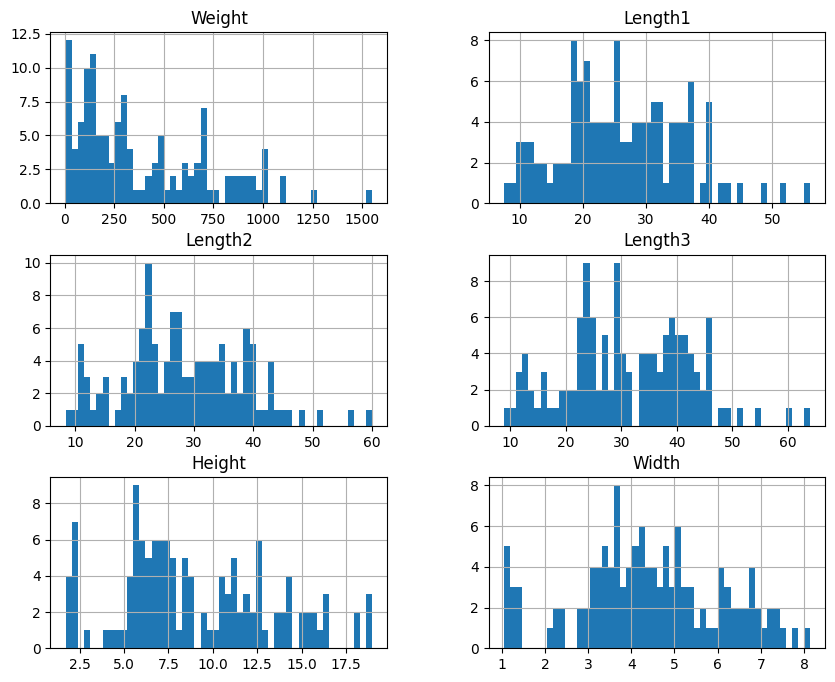

In [3]:
# Plot the distribution of the numerical variables
df_train.hist(bins=50, figsize=(10,8))
plt.show()

### Correlation between Variables

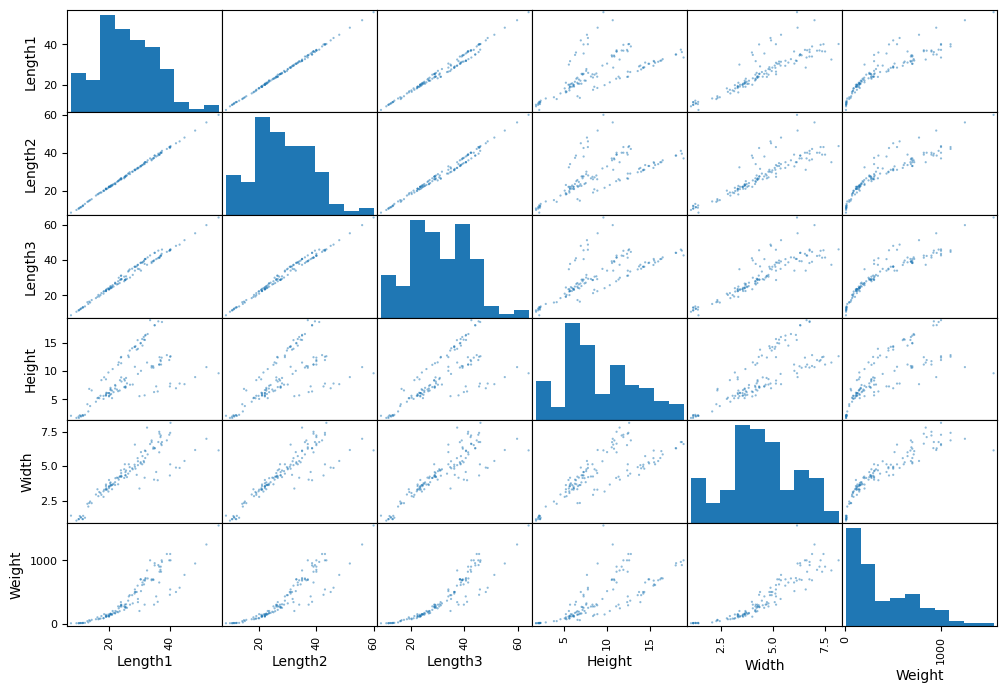

In [4]:
# Define the variables to check
attributes = ["Length1", "Length2", "Length3", "Height", "Width", "Weight"]
scatter_matrix(df_train[attributes], figsize=(12,8), s=10)
plt.show()

### Scatterplot Width and Length

As we can see from the below plot, the different species behave different when plotting width against length. One possibililty could be to create one regression for all species execpt for pikes, where another regression could be computed.

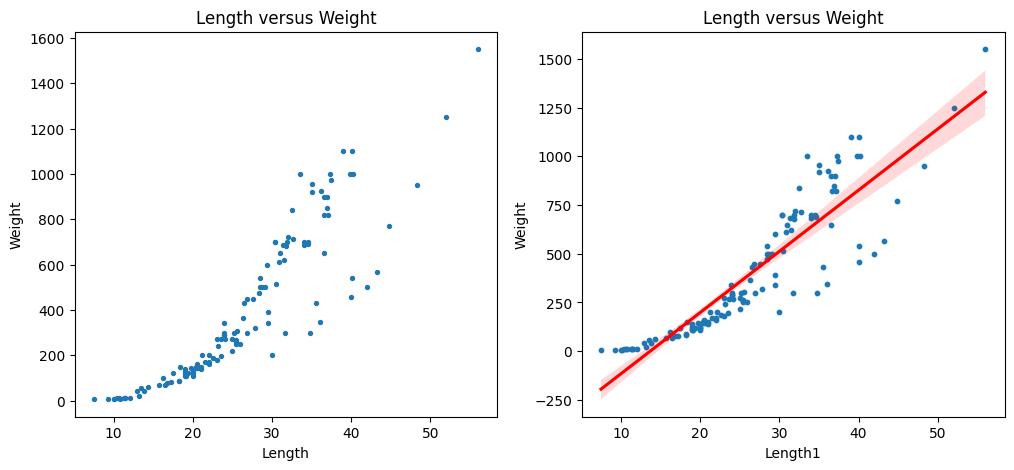

In [15]:
# Create basic Scatter plot
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].scatter(df_train["Length1"], df_train["Weight"], s=8)
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Weight")
ax[0].set_title("Length versus Weight")

ax[1].scatter(df_train["Length1"], df_train["Weight"], s=10)
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Weight")
ax[1].set_title("Length versus Weight")
# Adding the regression line using seaborn's 'lmplot'
sns.regplot(x="Length1", y="Weight", data=df_train, scatter=False, ax=ax[1], color="red")

plt.show()

In [5]:
# Some plotting
fig = px.scatter(df_train, x='Length1', y='Width', size='Weight', color='Species', title="Fish by Width and Length")

# Increase plot size
fig.update_layout(
    width=700,
    height=500
)
fig.show()

When plotting weight against Length one can see that there is not an exact linear relationship present. A more complex (non linear) relationship is present. Here a polynomial regression seems to be more suitable.

In [6]:
# Some plotting
fig = px.scatter(df_train, x='Length1', y='Weight', size='Weight', color='Species', title="Fish by Width and Length")

# Increase plot size
fig.update_layout(
    width=700,
    height=500
)
fig.show()

# Test Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
# Create train variables
X_train, columnnames_train = preprocess_data.data_preprocessing(df_train)
y_train = df_train[['Weight']].values.ravel()

In [20]:
df_test = read_data.read_file("fish_regression", "strat_test_set", csv=True)
X_test, columnnames_train = preprocess_data.data_preprocessing(df_test)
y_test = df_test[['Weight']].values.ravel()

In [18]:
# Define Linear Regression model
lin_reg = LinearRegression()

# Create 5-fold cross-validation object
cv = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lin_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=cv,
                           return_train_score=True)
grid_search.fit(X_train, y_train)

# Print the best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

Best Parameters:  {'fit_intercept': False}


In [27]:
y_train

array([ 200. ,    9.9,   80. ,  242. ,  685. ,  700. ,  500. ,  110. ,
        650. ,  300. ,   12.2,  290. ,  925. , 1250. ,   78. ,  430. ,
        100. ,   55. ,  390. ,  700. ,  188. ,  200. ,    5.9,  840. ,
         40. ,  700. ,  920. ,  120. ,  150. ,  955. ,    8.7,  850. ,
        200. ,  500. ,  900. ,  650. ,    9.8,  115. ,   12.2,    7. ,
        475. ,  306. ,  145. ,  340. ,  820. ,   60. ,  456. ,  700. ,
        567. ,  150. ,  714. ,  110. ,  685. ,  363. ,    6.7,  300. ,
        180. ,  600. ,   40. ,  218. ,  450. ,  300. ,  145. ,  500. ,
        265. ,  320. ,  270. ,  300. ,   70. ,  820. ,  290. ,  161. ,
       1100. ,    7.5,  300. ,  540. ,  125. ,   69. ,  340. , 1000. ,
        975. , 1550. ,  150. ,  430. ,  145. ,  140. ,  270. ,  250. ,
        680. ,    9.8,  250. ,  120. ,  169. ,  450. ,  160. ,  514. ,
       1100. ,  700. ,  130. ,  272. ,  620. ,  720. ,   87. ,  110. ,
        120. ,  950. ,  500. , 1000. ,   19.7,  273. ,  770. ,  150. ,
      

In [26]:
y_train.mean()

393.1595238095238

In [25]:
# Extract coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# If you have feature names, you can print the coefficients with feature names
if columnnames_train.any():
    feature_coefficients = dict(zip(columnnames_train, coefficients))
    print("Feature Coefficients:")
    for feature, coef in feature_coefficients.items():
        print(f"{feature}: {coef}")
else:
    print("No feature names available.")


Coefficients: [ 299.10796745  423.88680873  416.18554046  192.11771821  400.70315772
  748.332067    376.00317456 -645.20936008  827.6830442   132.58626043
   71.3677917    38.46894006]
Intercept: 0.0
Feature Coefficients:
cat_pipeline__Species_Bream: 299.107967447899
cat_pipeline__Species_Parkki: 423.88680872601736
cat_pipeline__Species_Perch: 416.1855404564445
cat_pipeline__Species_Pike: 192.1177182122903
cat_pipeline__Species_Roach: 400.70315772375545
cat_pipeline__Species_Smelt: 748.3320669972602
cat_pipeline__Species_Whitefish: 376.0031745597345
num_pipeline_standard__Length1: -645.2093600831341
num_pipeline_standard__Length2: 827.6830441952286
num_pipeline_standard__Length3: 132.58626043048213
num_pipeline_standard__Height: 71.3677917008425
num_pipeline_standard__Width: 38.468940062616355


In [21]:
# Predict using the trained model
y_pred = best_model.predict(X_test)

In [22]:
# Compute Residuals
residuals = y_test - y_pred

In [23]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f'Mean Squared Error (MSE): {round(mse,0)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse,0)}')
print(f'Mean Absolute Error (MAE): {round(mae,0)}')
print(f'R-squared (R2) Score: {round(r2,2)}')

Mean Squared Error (MSE): 26687.0
Root Mean Squared Error (RMSE): 163.0
Mean Absolute Error (MAE): 102.0
R-squared (R2) Score: 0.86
